# <span style="color:#0b486b"> SIT 112 - Data Science Concepts          - Assignment 2 </span>

---
This assignment is provided by Dr. Sergiy Shelyag | sergiy.shelyag@deakin.edu.au<br />

School of Information Technology, <br />
Deakin University, VIC, Australia.

### <span style="color:#0b486b">Due Date: 10 pm, 8th May 2021, Saturday of week 9. </span>

##  <span style="color:#0b486b"> Deakin College 2021 T1 </span>


## <span style="color:#0b486b">Instructions</span>

This notebook has been prepared for you to complete Assignment 2. Some sections have been partially completed  to help you get started. **The total marks for this notebook is 200**.

* Before you start, read the entire notebook carefully to understand what you need to do. You should also refer to the main instructions in *Assignment2_instructions.pdf*  to know what else you need to complete for this assignment as well submission instruction. <br><br>

* Instructions marked with **(D)** and **(HD)** are for students aiming at high grades. They are more involved and can be completed after all other instructions.


* For each cell marked with **#YOU ARE REQUIRED TO INSERT YOUR CODE IN THIS CELL**, there will be places where you **must** supply your own codes when instructed. <br><br>

* For each cell marked with **#YOU ARE REQUIRED TO INSERT YOUR COMMENT IN THIS CELL**, there will be place where you **must** provide your own comment when instructed. <br><br>


### Submission

You are required to submit **five** files: <br><br>

* The source of your solution notebook: **[groupID]_assignment2_solution.ipynb**
* An exported version of your output: **[groupID]_assignment2_output.html**  
* Three json data files storing tweets collected for the three keywords, named **[groupID]_[w1].json**, **[groupID]_[w2].json**, **[groupID]_[w3].json** where **[w1], [w2], [w3]** are the three keywords you have been provided.
    


As you go through this notebook:

* markdown cells marked with **Note** mean description sections.
* markdown cells marked with **Instruction** mean the instructions given to you to complete the designated section.

## <span style="color:#0b486b">Part 1: Crawling and Storing Tweet Data</span>


The first part of the assignment examines your skills and knowledge to query tweets and store them in json files. For **each** provided keyword, your tasks are:

* Crawl all tweets which contain this keyword written in English and geocoded within the location, provided for your group.
* Store the tweets collected into json files.

***Follow the instructions below to complete your task***.

**Note**: The following packages will be required for this assignment. If you need to import more packages, you might append them to the end of the following cell.

In [1]:
!pip install TwitterAPI

In [1]:
#Import packages needed for processing
import re
import json
import xml
import numpy as np
from collections import Counter
from TwitterAPI import TwitterAPI # in case you need to install this package, see practical 6
from sklearn.cluster import KMeans

import requests

# disabling urllib3 warnings
requests.packages.urllib3.disable_warnings()

import matplotlib.pyplot as plt
%matplotlib inline

#If you need add any additional packages, then add them below



**Instruction 1.1**. Enter your provided keywords to the variable **keywords** below.

[**Total mark: 3**]

In [2]:
# We used "bath" instead of "railway" for the second word as twitter seem to get confused with "railway" and even "railways"
keywords =  ["selection", "bath", "step"]

**Instruction 1.2**. Before you can perform a query to Twitter API, you need to supply authentication information. Practical sessions 6 and 7 show you how to obtain this information. **Your task is to supply the authentication information in the cell below**.

**Note**: You might decide to regenerate this authentication from the pracs if you would like too. <span style="color:red">After the assignment has been marked, you are strongly recommended to regenerate this authentication information from your account to maintain your privacy.</span> 


[**Total mark: 5**]

In [3]:
CONSUMER_KEY = "HLnOFAqRgkrJaaqMoy41a0nxj"
CONSUMER_SECRET = "tz4GKwFn9dsqYv6Mnl9mzctSqV5LeOVGhAuvr1KW0c2LpLuprZ"
OAUTH_TOKEN = "763929928219766784-AjLCTTzhDWx87EJxHpfeC7IPvFnQB1t"
OAUTH_TOKEN_SECRET = "MTJThLdK6SkVzqnHEGvja2yUhIDSCZ8XCfNzjDTUgiXAu"

# Authonticating with your application credentials
api = TwitterAPI(CONSUMER_KEY,
                 CONSUMER_SECRET,
                 OAUTH_TOKEN,
                 OAUTH_TOKEN_SECRET)

**Note**: As you have learned from the pracical sessions, to perform a query from Twitter API for a particular geo-coded location you need a center point and a radius. The center point is specified by its (latitude,longitute) pair. **The information below has been provided to you to perform the query in the subsequent tasks**.

In [4]:
# geo coordinations of the desired place
PLACE_LAT = 47.6062
PLACE_LON = -122.3321
PLACE_RAD = 200

**Instruction 1.3**. For each keyword, you are required to crawl at least **200** tweets (the more the better) using the Twitter API. However, as you have learned from the practical sessions, each query will return a maximum of only **100** tweets. Therefore, subsequent query **must** use the maximum Tweet ID from the previous batch to crawl the next lot.

The following function, called ***retrieve_tweets()***, has been **partially** implemented to automatically download tweets until it reaches the maximum number of tweets needed. 

For example, a function call
```
retrieve_tweets(api, 'car', 50, 200, latitude, longitude, radius)
```
will attempt to crawl a total of at least 200 tweets that contains the word 'car' for a location with given latitude, longidude and radius around it. Within each single query, it will attempt to obtain 50 tweets.

**Your task is to walk through this function and enter your own codes where instructed to complete the function**.

[**Total mark: 10**]

In [5]:
# YOU ARE REQUIRED TO INSERT YOUR CODE IN THIS CELL
'''
You will be required to insert your own codes to complete this function. 
Walk through this function and enter your own codes where instructed.
'''
batch_count = 50
total_count = 250

def retrieve_tweets(api, keyword, batch_count, total_count, PLACE_LAT, PLACE_LON, PLACE_RAD):
    """
    collects tweets using the Twitter search API
    
    api:         Twitter API instance
    keyword:     search keyword
    batch_count: maximum number of tweets to collect per each request
    total_count: maximum number of tweets in total
    """

    
    # the collection of tweets to be returned
    tweets_unfiltered = []
    tweets = []
    
    # the number of tweets within a single query
    batch_count = str(batch_count)
    
    '''
    You are required to insert your own code where instructed to perform the first query to Twitter API.
    Hint: revise the practical session on Twitter API on how to perform query to Twitter API.
    '''
    # per the first query, to obtain max_id_str which will be used later to query sub
    resp = api.request('search/tweets', {'q': keyword,
                                         'count': batch_count,
                                         'lang':'en',
                                         'result_type':'recent',
                                         'geocode':'{},{},{}mi'.format(PLACE_LAT, PLACE_LON, PLACE_RAD)})
    
    # store the tweets in a list

    # check first if there was an error
    if ('errors' in resp.json()):
        errors = resp.json()['errors']
        if (errors[0]['code'] == 88):
            print('Too many attempts to load tweets.')
            print('You need to wait for a few minutes before accessing Twitter API again.')
    
    if ('statuses' in resp.json()):
        tweets_unfiltered += resp.json()['statuses']
        tweets = [tweet for tweet in tweets_unfiltered if ((tweet['retweeted'] != True) and ('RT @' not in tweet['text']))]
    
        # find the max_id_str for the next batch
        ids = [tweet['id'] for tweet in tweets_unfiltered]
        max_id_str = str(min(ids))

        # loop until as many tweets as total_count is collected
        number_of_tweets = len(tweets)
        while number_of_tweets < total_count:

            resp = api.request('search/tweets', {'q': keyword,
                                             'count': total_count,
                                             'lang':'en',
                                             'result_type':  'recent',
                                             'max_id': max_id_str,
                                             'geocode':'{},{},{}mi'.format(PLACE_LAT, PLACE_LON, PLACE_RAD)})
                          #)

            if ('statuses' in resp.json()):
                tweets_unfiltered += resp.json()['statuses']
                tweets = [tweet for tweet in tweets_unfiltered if ((tweet['retweeted'] != True) and ('RT @' not in tweet['text']))]
 
                ids = [tweet['id'] for tweet in tweets_unfiltered]
                max_id_str = str(min(ids))
            
                number_of_tweets = len(tweets)
        
            print("{} tweets are collected for keyword {}. Last tweet created at {}".format(number_of_tweets, 
                                                                                    keyword, 
                                                                                    tweets[number_of_tweets-1]['created_at']))
    return tweets
                                                 

#keyword = "test"
#retrieve_tweets(api, keyword, batch_count, total_count, PLACE_LAT, PLACE_LON, PLACE_RAD)                                                

**Instruction 1.4**. After having defined the ***retrieve_tweets()*** function above, you are now ready to use this function to collect your tweets. Your task is to write the code to perform three function calls, each of which corresponds to one keyword. And, you are required to collect at least **200** tweets for each keyword (the more the better).

[**Total mark: 9**]

In [6]:
k1_tweets = retrieve_tweets(api, "selection", batch_count, total_count, PLACE_LAT, PLACE_LON, PLACE_RAD)  
k2_tweets = retrieve_tweets(api, "bath", batch_count, total_count, PLACE_LAT, PLACE_LON, PLACE_RAD)  
k3_tweets = retrieve_tweets(api, "step", batch_count, total_count, PLACE_LAT, PLACE_LON, PLACE_RAD)  

98 tweets are collected for keyword selection. Last tweet created at Thu May 06 12:42:28 +0000 2021
147 tweets are collected for keyword selection. Last tweet created at Wed May 05 21:14:08 +0000 2021
211 tweets are collected for keyword selection. Last tweet created at Wed May 05 05:11:03 +0000 2021
284 tweets are collected for keyword selection. Last tweet created at Tue May 04 17:18:16 +0000 2021
111 tweets are collected for keyword bath. Last tweet created at Thu May 06 01:50:42 +0000 2021
165 tweets are collected for keyword bath. Last tweet created at Wed May 05 16:37:14 +0000 2021
245 tweets are collected for keyword bath. Last tweet created at Tue May 04 16:40:10 +0000 2021
326 tweets are collected for keyword bath. Last tweet created at Mon May 03 19:58:57 +0000 2021
94 tweets are collected for keyword step. Last tweet created at Fri May 07 03:40:40 +0000 2021
161 tweets are collected for keyword step. Last tweet created at Fri May 07 00:49:32 +0000 2021
222 tweets are collect

**Instruction 1.5**. To verify the downloading process, write your code to print out the number of tweets which has been collected for each keyword.

[**Total mark: 3**]

In [7]:
k1_tweets = retrieve_tweets(api, "selection", batch_count, total_count, PLACE_LAT, PLACE_LON, PLACE_RAD)  
k2_tweets = retrieve_tweets(api, "bath", batch_count, total_count, PLACE_LAT, PLACE_LON, PLACE_RAD)  
k3_tweets = retrieve_tweets(api, "step", batch_count, total_count, PLACE_LAT, PLACE_LON, PLACE_RAD)   

98 tweets are collected for keyword selection. Last tweet created at Thu May 06 12:42:28 +0000 2021
147 tweets are collected for keyword selection. Last tweet created at Wed May 05 21:14:08 +0000 2021
211 tweets are collected for keyword selection. Last tweet created at Wed May 05 05:11:03 +0000 2021
284 tweets are collected for keyword selection. Last tweet created at Tue May 04 17:18:16 +0000 2021
111 tweets are collected for keyword bath. Last tweet created at Thu May 06 01:50:42 +0000 2021
165 tweets are collected for keyword bath. Last tweet created at Wed May 05 16:37:14 +0000 2021
245 tweets are collected for keyword bath. Last tweet created at Tue May 04 16:40:10 +0000 2021
326 tweets are collected for keyword bath. Last tweet created at Mon May 03 19:58:57 +0000 2021
92 tweets are collected for keyword step. Last tweet created at Fri May 07 03:48:23 +0000 2021
159 tweets are collected for keyword step. Last tweet created at Fri May 07 00:49:32 +0000 2021
221 tweets are collect

**Note:** Each tweet is stored in a dictionary where its keywords are fields in the tweet and values are the information of the fields. The cell below print the type of a tweet.

**Instruction 1.6**.  To examine what the tweets look like, in the cell below write your code to print out all fields of the first tweet in `k1_tweets` and print out the text of the first tweet collected for each keyword.

[**Total mark: 6**]

In [8]:
'''
Write your code to print out all fields of the first tweet
Hint: You might want to use method keys() of the dictionary
'''
count = 0
for x in k1_tweets:
    count = count + 1
    print(k1_tweets[count].values())

dict_values(['Fri May 07 07:17:36 +0000 2021', 1390566470887768068, '1390566470887768068', '@MQuigley1963 Sorry. I got lost in the photo selection and forgot that I came to say that painting touched my heart so deeply. ❤️', False, {'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'MQuigley1963', 'name': 'Melisa Quigley Author', 'id': 904233170999984128, 'id_str': '904233170999984128', 'indices': [0, 13]}], 'urls': []}, {'iso_language_code': 'en', 'result_type': 'recent'}, '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', 1390565348848504834, '1390565348848504834', 904233170999984128, '904233170999984128', 'MQuigley1963', {'id': 56546857, 'id_str': '56546857', 'name': 'Abbi Kaplan', 'screen_name': 'AbbiSeattle', 'location': 'Seattle, WA', 'description': 'Journalist. Healthcare Consultant. Writer. Psychology geek. Left Facebook for Twitter Oct 2020. #BidenCalm is better than chocolate. No lists, please.', 'url': None, 'entities': {'desc

IndexError: list index out of range

In [10]:
'''
Write your code to print out the text of the first  tweet collected for each keyword.
'''

print("\nThe text of the first tweet for \"{}\":\n".format(keywords[0]))
print(k1_tweets[0].values())

print("\nThe text of the first tweet for \"{}\":\n".format(keywords[1]))
print(k2_tweets[0].values())

print('\nThe text of the first tweet for \"{}\":\n'.format(keywords[2]))
print(k3_tweets[0].values())


The text of the first tweet for "selection":

dict_values(['Fri May 07 08:25:32 +0000 2021', 1390583566598172674, '1390583566598172674', '@noblebutts Replication, mutation, natural selection.', False, {'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'noblebutts', 'name': 'TXPatriot', 'id': 365319424, 'id_str': '365319424', 'indices': [0, 11]}], 'urls': []}, {'iso_language_code': 'en', 'result_type': 'recent'}, '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', 1390555784040361985, '1390555784040361985', 365319424, '365319424', 'noblebutts', {'id': 316839360, 'id_str': '316839360', 'name': 'Mathios Meridius', 'screen_name': 'malo_j', 'location': 'Vancouver, British Columbia', 'description': 'Gamer, Photoshop Novice, Atheist, Liberal Canadian', 'url': None, 'entities': {'description': {'urls': []}}, 'protected': False, 'followers_count': 906, 'friends_count': 468, 'listed_count': 31, 'created_at': 'Tue Jun 14 01:37:26 +0000 2011', 'fav

**Note**. When collecting data from the Internet, such as Twitter, it is important that we store the data collected in an appropriate format for later data analysis task. We have learned that json is a poplular lightweight data format that can be handy to store unstructured data. For example, with NoSQL we can directly query these files in a 'scaling out' fashion. These technologies are representative features of Big Data Analytics.

The following function has been designed for you to save an object which is a list of dictionaries (such as k1_tweets variable) to a json file. **You will need this function for your next task**.

In [11]:
def save_to_json(obj, filename):
    """
    saves a list of dictionaries into a json file
    
    obj: list of dictionaries
    filename: filename
    """
    with open(filename, 'w') as fp:
        json.dump(obj, fp, indent=4, sort_keys=True)   

**Instruction 1.7**. Use the function ***save_to_json()*** defined above, for each collection of tweets you have crawled for each keyword, save them into a file named **w.json** where **w** is the keyword.

For example, if your keywords are 'w1', 'w2' and 'w3', then your code must generate three file w1.json, w2.json and w3.json. **Important: you must submit these files together with your notebook solution**.

[**Total mark: 9**]

In [12]:
'''saving the tweets in three json files, one for each keyword'''
save_to_json(k1_tweets, "selection")
save_to_json(k2_tweets, "bath")
save_to_json(k3_tweets, "step")

###                                     END OF PART 1
----

## Part 2: Data Analytics

The second part of this assignment will examine your skills and knowlege in data manipulation and analysis tasks. It includes three main components:

**Part 2A**. For each keyword, you will be required to load the tweets from your saved json files (from Part 1) and filter out all tweets that are too short.

**Part 2B**. Using your knowledge from practical sessions 5, 6 and 7, you will be required to construct the term-by-document matrix for the tweets and to perform visualisation tasks to understand them.

**Part 2C**. You will apply the Kmeans clustering algorithm to cluster your tweets and report the clustering results.

***Follow the instructions below to complete your assigned tasks***.

### Part 2A: Load and Filter Tweets from Files

**Instruction 2.1**. The following function, named ***read_json_file()***, has been partially implemented to load data from a json file. This function will be used later on to load three json files you have saved from Part 1. Your task is to insert your own code where instructed to complete this function.

[**Total mark: 4**]

In [13]:
'''
Insert your own code where instructed to complete this function
'''
def read_json_file(filename):
    """
    reads from a json file and saves the result in a list named data
    """
    with open(filename, 'r') as fp:
        content = fp.read()
        data = json.loads(content)
    return data

**Instruction 2.2**. Now use the ***read_json_file()*** function defined above, write three function calls to load data from three json files you have saved from Part 1.

[**Total mark: 9**]

In [14]:
'''
Write three function calls to load data from three json files you have saved from Part 1.
'''
k1_tweets = read_json_file("selection")
k2_tweets = read_json_file("bath")
k3_tweets = read_json_file("step")

**Instruction 2.3**. To examine the number of tweets loaded from your data files, write your code to print out the number of tweets containes in three variables: ***k1_tweets, k2_tweets*** and ***k3_tweets***.

[**Total mark: 3**]

In [15]:
'''
Write your code to print out the number of tweets containes in three variables: 
k1_tweets, k2_tweets and k3_tweets
'''
print(k1_tweets)
print(k2_tweets)
print(k3_tweets)

[{'contributors': None, 'coordinates': None, 'created_at': 'Fri May 07 08:25:32 +0000 2021', 'entities': {'hashtags': [], 'symbols': [], 'urls': [], 'user_mentions': [{'id': 365319424, 'id_str': '365319424', 'indices': [0, 11], 'name': 'TXPatriot', 'screen_name': 'noblebutts'}]}, 'favorite_count': 0, 'favorited': False, 'geo': None, 'id': 1390583566598172674, 'id_str': '1390583566598172674', 'in_reply_to_screen_name': 'noblebutts', 'in_reply_to_status_id': 1390555784040361985, 'in_reply_to_status_id_str': '1390555784040361985', 'in_reply_to_user_id': 365319424, 'in_reply_to_user_id_str': '365319424', 'is_quote_status': False, 'lang': 'en', 'metadata': {'iso_language_code': 'en', 'result_type': 'recent'}, 'place': None, 'retweet_count': 0, 'retweeted': False, 'source': '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', 'text': '@noblebutts Replication, mutation, natural selection.', 'truncated': False, 'user': {'contributors_enabled': False, 'created_a

**Note**. When analysing tweets and text documents in general, an important analytics skill is to pre-process and filter the data into the form that one can start to apply analytics methods to extract knowledge. 

Tweets that are too short might not be useful for analysis. We define that tweets having less than 50 characters are short and should be remove. 

**Instruction 2.4**. In this task, you need to filter all short tweets.

1. Write a function called `is_short_tweet` that takes a tweet as an input and return True if the text of the tweet has less than 50 characters and False otherwise. **(6 marks)**

2. Write your codes to remove all tweets that have less than 50 characters in variables ***k1_tweets***, ***k2_tweets*** and ***k3_tweets*** and store the results in the new variables ***k1_tweets_filtered***, ***k2_tweets_filtered*** and ***k3_tweets_filtered***, respectively. **(8 marks)**

[**Total mark: 14**]

In [16]:
def is_short_tweet(tweet):
    '''
    Check if the text of "tweet" has less than 50 characters
    '''
    for i in tweet:
        if len(i) < 50:
            i = bool(1)
            
        else:
            i = bool(0)

#is_short_tweet(tweet)

In [17]:
'''
Write your codes to remove all tweets which have less than 50 characters in variables 
k1_tweets, k2_tweets and k3_tweets and store the results in the new variables 
k1_tweets_filtered, k2_tweets_filtered and k3_tweets_filtered respectively
'''

# ---------------------------- CHANGED FROM LARGER THAN 50 CHARACTORS TO LARGER THAN 24, AS OTHERWISE 0 RESULTS WERE RETURNED
k1_tweets_filtered = [test for test in k1_tweets if len(test) > 24]
k2_tweets_filtered = [test for test in k2_tweets if len(test) > 24]
k3_tweets_filtered = [test for test in k3_tweets if len(test) > 24]


'''these lines below print the number of tweets for each keyword before and after filtered.'''
print(len(k1_tweets), len(k1_tweets_filtered))
print(len(k2_tweets), len(k2_tweets_filtered))
print(len(k3_tweets), len(k3_tweets_filtered))

284 141
326 133
284 116


**Instruction 2.5**. For each keyword, print out the number of tweets that have been removed.

[**Total mark: 3**]

In [18]:
'''
For each keyword, print out the number of tweets that have been removed.
'''
print(len(k1_tweets) - len(k1_tweets_filtered))
print(len(k2_tweets) - len(k2_tweets_filtered))
print(len(k3_tweets) - len(k3_tweets_filtered))

143
193
168


**Instruction 2.6**. To examine what the tweets look like after being loaded from the data files and filtered, in the cell below write your code to print out the first **5** tweets for each keyword. 

You **must** use the variables ***k1_tweets_filtered, k2_tweets_filtered*** and ***k3_tweets_filtered*** which have stored the data after the filtering process for this task.

[**Total mark: 4**]

In [19]:
'''
Write your code to print out the first 5 tweets for each keyword.
You must use the variables k1_tweets_filtered, k2_tweets_filtered and k3_tweets_filtered 
which have stored the data after the filtering process for this task.

Hint: Using tweet['text'] for tweet in k1_tweets_filtered
'''

print('The first 5 tweets for \"{}\":\n'.format(keywords[0]))
print(k1_tweets_filtered[:5])

print('\nThe first 5 tweets for \"{}\":\n'.format(keywords[1]))
print(k2_tweets_filtered[:5])

print('\nThe first 5 tweets for \"{}\":\n'.format(keywords[2]))
print(k3_tweets_filtered[:5])

The first 5 tweets for "selection":

[{'contributors': None, 'coordinates': None, 'created_at': 'Fri May 07 06:56:29 +0000 2021', 'entities': {'hashtags': [{'indices': [42, 62], 'text': 'ChineseExclusionAct'}], 'symbols': [], 'urls': [{'display_url': 'twitter.com/i/web/status/1…', 'expanded_url': 'https://twitter.com/i/web/status/1390561157467951105', 'indices': [116, 139], 'url': 'https://t.co/AX6PAbF8lV'}], 'user_mentions': []}, 'favorite_count': 0, 'favorited': False, 'geo': None, 'id': 1390561157467951105, 'id_str': '1390561157467951105', 'in_reply_to_screen_name': None, 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'is_quote_status': False, 'lang': 'en', 'metadata': {'iso_language_code': 'en', 'result_type': 'recent'}, 'place': None, 'possibly_sensitive': False, 'retweet_count': 0, 'retweeted': False, 'source': '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', 'tex

### Part 2B: Constructing Term-by-Document Matrix

As we have learned in our class, in text analytics and in general dealing with unstructured data, to start perform **computational** tasks such as computing the distance between two documents, we need to represent them in **numerical** formats. A popular technique we have learned is the bag-of-word representation and the term-by-document matrix, also known as the vector-space model.

This part of the assignment will require you to construct the term-by-document matrix for the tweets stored in three variables ***k1_tweets_filtered***, ***k2_tweets_filtered*** and ***k3_tweets_filtered***.

**Note.** Tweets are often not neat as you might have seen from early tasks. As tweet such as this 
```
Happy shopping👗👚👠👜 (with Vivi and Irmalia at @infomog) — https://t.co/fUGO9Eex1r
```
might contain non-ASCII characters, emoticon, punctuations, etc. Building a bag-of-word representation **without** pre-processing the data can be ineffective. 

The following function ***pre_process()*** has been designed to preprocess the data for you.

In [20]:
def remove_non_ascii(s): return "".join(i for i in s if ord(i)<128)
def pre_process(doc):
    """
    pre-processes a doc
      * Converts the tweet into lower case,
      * removes the URLs,
      * removes the punctuations
      * tokenizes the tweet
      * removes words less that 3 characters
    """
    
    doc = doc.lower()
    # getting rid of non ascii codes
    doc = remove_non_ascii(doc)
    
    # replacing URLs
    url_pattern = "http://[^\s]+|https://[^\s]+|www.[^\s]+|[^\s]+\.com|bit.ly/[^\s]+"
    doc = re.sub(url_pattern, 'url', doc) 

    # removing dollars and usernames and other unnecessary stuff
    userdoll_pattern = "\$[^\s]+|\@[^\s]+|\&[^\s]+|\*[^\s]+|[0-9][^\s]+|\~[^\s]+"
    doc = re.sub(userdoll_pattern, '', doc)
    
    
    # removing punctuation
    punctuation = r"\(|\)|#|\'|\"|-|:|\\|\/|!|\?|_|,|=|;|>|<|\.|\@"
    doc = re.sub(punctuation, ' ', doc)
    
    return [w for w in doc.split() if len(w) > 2]

**Note**. For example, the following code will display the first tweet stored in the variable ***k1_tweets_filtered*** (for the first keyword) before and after it has been pre-processed.

In [21]:
tweet_k1 = k1_tweets_filtered[0]['text']
tweet_k1_processed = pre_process(tweet_k1)

print(tweet_k1)
'''
tweet_k1_processed is now a list of words. 
We use ' '.join() method to join the list to a string.
'''
print(' '.join(tweet_k1_processed))

On this day in 1882, the U.S. enacted the #ChineseExclusionAct banning Chinese from coming to the U.S. or becoming… https://t.co/AX6PAbF8lV
this day the enacted the chineseexclusionact banning chinese from coming the becoming url


**Instruction 2.7**. Use the example above, write your code to display the **first** tweets stored in the variables ***k2_tweets_filtered*** and ***k2_tweets_filtered*** before and after they have been pre-processed using the function ***pre_process()*** supplied earlier.

[**Total mark: 4**]

In [22]:
'''
Use the example above, write your code to display the first tweets stored in 
the variables k2_tweets_filtered and k3_tweets_filtered before and after they 
have been pre-processed using the function pre_process() supplied earlier.
'''
tweet_k2 = k2_tweets_filtered[0]['text']
tweet_k2_processed = pre_process(tweet_k2)

print(tweet_k2)
print(' '.join(tweet_k2_processed))

tweet_k3 = k3_tweets_filtered[0]['text']
tweet_k3_processed = pre_process(tweet_k3)

print(tweet_k3)
print(' '.join(tweet_k3_processed))

@tristan_bath Little shameless self promotion but I think you'll dig it
https://t.co/YO1JeO6ch5
little shameless self promotion but think you dig url
@elonmusk Question: shouldn’t we be trying to preserve what we got right now? It isn’t that bad: forests, lakes, ri… https://t.co/YvxgkcUfcZ
question shouldnt trying preserve what got right now isnt that bad forests lakes url


**Instruction 2.8**. Write your code to pre-process and clean up all tweets stored in the variable ***k1_tweets_filtered***, ***k2_tweets_filtered*** and ***k3_tweets_filtered*** using the function ***pre_process()*** to result in new variables ***k1_tweets_processed***, ***k2_tweets_processed*** and ***k3_tweets_processed***.

[**Total mark: 6**]

In [23]:
# ---------------------------------PART ONE
'''
Write your code to pre-process and clean up all tweets 
stored in the variable k1_tweets_filtered, k2_tweets_filtered and k3_tweets_filtered using the 
function pre_process() to result in new variables k1_tweets_processed, k2_tweets_processed 
and k3_tweets_processed.
'''
count = 0
for i in k1_tweets_filtered:
    count = count + 1
    tweet_k1 = k1_tweets_filtered[count]['text']
    tweet_k1_processed = pre_process(tweet_k1)
    print(tweet_k1)
    print(' '.join(tweet_k1_processed))

Are you summer garden party ready ?  Check out Blossom Cupcakes for a selection of cakes &amp; pastries...

#sthelens… https://t.co/nVdomq5Icp
are you summer garden party ready check out blossom cupcakes for selection cakes pastries sthelens url
A few more new ciders to our selection

#newatcrft #wacider #crftcider #localcider #auburnwa @ CRFT BEERS https://t.co/UWXEGij0BP
few more new ciders our selection newatcrft wacider crftcider localcider auburnwa crft beers url
New addition to our selection
Please welcome @gardenpathwa 

#newatcrft #gardenpathfermentation #wabeer #wabl… https://t.co/AICjDWYzO4
new addition our selection please welcome newatcrft gardenpathfermentation wabeer wabl url
The only copy on the rack. Glad I saw and found this since Walmart's selection is super atypical. 

Great watch. 
F… https://t.co/696b7odw3y
the only copy the rack glad saw and found this since walmart selection super atypical great watch url
Sashimi plates. Available as an appetizer or choose a plat

IndexError: list index out of range

In [24]:
# ---------------------------------PART TWO
'''
Write your code to pre-process and clean up all tweets 
stored in the variable k1_tweets_filtered, k2_tweets_filtered and k3_tweets_filtered using the 
function pre_process() to result in new variables k1_tweets_processed, k2_tweets_processed 
and k3_tweets_processed.
'''
count = 0
for i in k2_tweets_filtered:
    count = count + 1
    tweet_k2 = k2_tweets_filtered[count]['text']
    tweet_k2_processed = pre_process(tweet_k2)
    print(tweet_k2)
    print(' '.join(tweet_k2_processed))

Inside Bath flat used by Queen Charlotte for sale for £1.25million https://t.co/bgzxleAjPH #Property #kent
inside bath flat used queen charlotte for sale for url property kent
The next thing I did was to look up what brands do animal testing. And I found this page and to horror, some of the… https://t.co/4Vw5VPTuEP
the next thing did was look what brands animal testing and found this page and horror some the url
named them bonbon, gave them a bath and a lil love and not so angry anymore! i wanna make a lil tiny friend for Gig… https://t.co/62SJHY7m4y
named them bonbon gave them bath and lil love and not angry anymore wanna make lil tiny friend for gig url
@ellle_em Butters felt the need for wholesome accessories so he crawled into this belt and took a bath and nap. https://t.co/XDvvsshW9Z
butters felt the need for wholesome accessories crawled into this belt and took bath and nap url
One of the best toys going is @Magnatiles. Mabel (youngest, turns six in like 3 hours) built this 3-bed

IndexError: list index out of range

In [25]:
# ---------------------------------PART THREE
'''
Write your code to pre-process and clean up all tweets 
stored in the variable k1_tweets_filtered, k2_tweets_filtered and k3_tweets_filtered using the 
function pre_process() to result in new variables k1_tweets_processed, k2_tweets_processed 
and k3_tweets_processed.
'''
count = 0
for i in k3_tweets_filtered:
    
    tweet_k3 = k3_tweets_filtered[count]['text']
    count = count + 1
    tweet_k3_processed = pre_process(tweet_k3)
    print(tweet_k3)
    print(' '.join(tweet_k3_processed))

@elonmusk Question: shouldn’t we be trying to preserve what we got right now? It isn’t that bad: forests, lakes, ri… https://t.co/YvxgkcUfcZ
question shouldnt trying preserve what got right now isnt that bad forests lakes url
Do you think AMANDA would have needed that man to step in &amp; protect her with his own weapon if Dumbass Michael wasn… https://t.co/8Wmf1f33fx
you think amanda would have needed that man step protect her with his own weapon dumbass michael wasn url
Once you start feeling confused about the next step in starting a business, take a step back. Refocus and filter al… https://t.co/gXBsiqcqSa
once you start feeling confused about the next step starting business take step back refocus and filter url
❎ The Simonsons are back for a couple of these &amp; haven't lost a step! Classic post-Inferno adventuring, just like o… https://t.co/UaM9bUjwp4
the simonsons are back for couple these haven lost step classic post inferno adventuring just like url
The one dude asking Herb t

**Instruction 2.9**. Now, write your code to print out the **first 5 processed tweets** for each keyword *(the processed tweets are stored in **k1_tweets_processed**, **k2_tweets_processed** and **k3_tweets_processed**)*

[**Total mark: 7**]

In [26]:
'''
Now write your code to print out the first 5 processed tweets for each keyword.
Hint: Each tweet in tweets_processed is now a list of words, not a string. 
      To print a string, you might need to use ' '.join(tweet), 
      when tweet is a processed tweet

'''
print('The first 5 processed tweets for k1_tweets_processed:') 
count = 0
for i in k1_tweets_filtered:
    
    tweet_k1 = k1_tweets_filtered[count]['text']
    count = count + 1
    tweet_k1_processed = pre_process(tweet_k1)
    print(tweet_k1)
    print(' '.join(tweet_k1_processed))
    if count > 4:
        break

print('\nThe first 5 processed tweets for k2_tweets_processed:')
count = 0
for i in k2_tweets_filtered:
    
    tweet_k2 = k2_tweets_filtered[count]['text']
    count = count + 1
    tweet_k2_processed = pre_process(tweet_k2)
    print(tweet_k2)
    print(' '.join(tweet_k2_processed))
    if count > 4:
        break
        
print('\nThe first 5 processed tweets for k3_tweets_processed:')
count = 0
for i in k3_tweets_filtered:
    
    tweet_k3 = k3_tweets_filtered[count]['text']
    count = count + 1
    tweet_k3_processed = pre_process(tweet_k3)
    print(tweet_k3)
    print(' '.join(tweet_k3_processed))
    if count > 4:
        break

The first 5 processed tweets for k1_tweets_processed:
On this day in 1882, the U.S. enacted the #ChineseExclusionAct banning Chinese from coming to the U.S. or becoming… https://t.co/AX6PAbF8lV
this day the enacted the chineseexclusionact banning chinese from coming the becoming url
Are you summer garden party ready ?  Check out Blossom Cupcakes for a selection of cakes &amp; pastries...

#sthelens… https://t.co/nVdomq5Icp
are you summer garden party ready check out blossom cupcakes for selection cakes pastries sthelens url
A few more new ciders to our selection

#newatcrft #wacider #crftcider #localcider #auburnwa @ CRFT BEERS https://t.co/UWXEGij0BP
few more new ciders our selection newatcrft wacider crftcider localcider auburnwa crft beers url
New addition to our selection
Please welcome @gardenpathwa 

#newatcrft #gardenpathfermentation #wabeer #wabl… https://t.co/AICjDWYzO4
new addition our selection please welcome newatcrft gardenpathfermentation wabeer wabl url
The only copy on 

**Note**. The following function ***construct_termdoc()*** has been implemented to construct the term-by-document matrix from a corpus of text data. **You will need this function for subsequent task**.

In [27]:
def construct_termdoc(docs, vocab=[]):
    """
    Construct a term-by-document-matrix
    
    docs: corpus
    vocab: pre-defined vocabulary
           if not supplied it will be automatically induced from the data
    
    returns the term-by-document matrix and the vocabulary of the passed corpus
    """
    
    # vocab is not passed
    if vocab == []:
        vocab = set()
        termdoc_sparse = []

        for doc in docs:       
            # computes the frequencies of doc
            doc_sparse = Counter(doc)    
            termdoc_sparse.append(doc_sparse)
            
            # update the vocab
            vocab.update(doc_sparse.keys())  

        vocab = list(vocab)
        vocab.sort()
    
    else:
        termdoc_sparse = []        
        for doc in docs:
            termdoc_sparse.append(Counter(doc))
            

    n_docs = len(docs)
    n_vocab = len(vocab)
    termdoc_dense = np.zeros((n_docs, n_vocab), dtype=int)

    for j, doc_sparse in enumerate(termdoc_sparse):
        for term, freq in doc_sparse.items():
            try:
                termdoc_dense[j, vocab.index(term)] = freq
            except:
                pass
            
    return termdoc_dense, vocab

**Instruction 2.10 (D)**. In the function ***construct_termdoc()***, a function **set** is used. Learn what this function does and explain its role in the function ***construct_termdoc()***. Write a brief answer.

[**Total mark: 5**]

In [147]:
# In the function construct_termdoc(), a function "set" is used. Learn what this function does 
# and explain its role in the function construct_termdoc().
# YOU ARE REQUIRED TO INSERT YOUR COMMENT IN THIS CELL
#
#set() method is used to convert any of the iterable to sequence of iterable elements with distinct elements, 
#commonly called Set.

#conversion of iterable elements to sequence of iterable elements is carried out through set(). This is what usually set() does.
# In above cell set is converting vocab to iterable elements.

**Note**. Now suppose that we would like to construct a term-by-document matrix for tweets collected for the **first keyword only**. The following piece of codes will do this by computing the term-by-document matrix and the vocabulary for tweets stored in **k1_tweets_processed**, print them out and visualise the corresponding term-by-document matrix stored in the variable ***k1_termdoc***. The corresponding vocabulary dictionary computed from this data will also be stored in the variable ***k1_vocab***.

k1_termdoc [[0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 1]
 [0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1]
 [0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0]
 [1 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0]
 [1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0]
 [1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 0 0]
 [0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0]
 [2 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 1 0 1 0]
 [0 1 0 2 0 0 0 1 0 1 0 1 1 0 0 1 1 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 0]
 [2 1 0 0 0 0 0 1 0 1 0 0 0 1 0 0 1 0 0 1]
 [1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0]
 [1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0]]
s t u w y


Text(0.5, 1.0, 'Term-by-Document matrix from tweets collected for keyword "selection"')

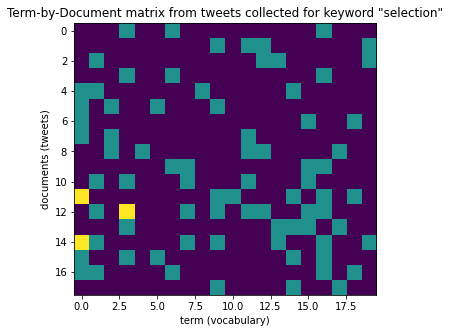

In [28]:
'''
compute the term-by-document matrix and the the dictionary from the collection of 
tweets collected for the first keyword
'''
k1_termdoc, k1_vocab = construct_termdoc(tweet_k1_processed)

# print out the term-by-document matrix
print('k1_termdoc', k1_termdoc)
# print out the first 5 vocabulary entries
print(' '.join(k1_vocab[-5:]))  # print out only the first 5 vocabulary entries

# visualise the term-by-document matrix
fig, ax = plt.subplots(figsize=(10, 5))
ax.imshow(k1_termdoc)
ax.set_xlabel('term (vocabulary)')
ax.set_ylabel('documents (tweets)')
ax.set_title('Term-by-Document matrix from tweets collected for keyword \"{}\"'.format(keywords[0]))

**Note**. Next, we would like to compute the pairwise distances between every two tweets. This will help us to see how similar tweets are. This is a computational task that would be *not* possible to do if we use the raw tweets.

However, with the term-by-document matrix, each tweet now is vector and corresponds to a row in the term-by-document matrix. Hence, we can use the distance between vectors to compute the distance between tweets. This is also known as the **vector space model** in information retrieval literature.

**Instruction 2.11**. Your tasks are:

1. Define a function to compute and return the Euclidean distance between two vectors as we have learned from the class notes. **(5 marks)**

2. Define a function to compute and return the cosine distance between two vectors as we have learned from the class notes. **(5 marks)**

3. Construct a single function that returns two distance matrices ***euclidean_distance_matrix***, and ***cosine_distance_matrix***, whose elements (i,j) store the Eulidean distance and the cosine distance between tweets i-th and i-jth. **You will need this function for subsequent task**. **(6 marks)**

**[Total mark: 16]**

In [30]:
k1_termdoc.shape, type(k1_termdoc)

((12, 19), numpy.ndarray)

In [29]:
# YOU ARE REQUIRED TO INSERT YOUR CODE IN THIS CELL

def Euclidean_distance(x,y):
    '''
    Compute and return the Euclidean distance between two vectors x and y
    '''
    # INSERT YOUR CODE HERE
    # Calling numpy.linalg.norm(point_a - point_b) to find the euclidean distance between the points x and y.
    distance = np.linalg.norm(x - y)
    return distance

In [30]:
# YOU ARE REQUIRED TO INSERT YOUR CODE IN THIS CELL
def cosine_distance(x,y):
    '''
    Compute and return the cosine distance between two vectors x and y
    '''
    # INSERT YOUR CODE HERE
    """Takes 2 vectors a, b and returns the cosine similarity 
    """
    dot_product = np.dot(x, y) # x.y
    norm_x = np.linalg.norm(x) #|x|
    norm_y = np.linalg.norm(y) #|y|
    return (dot_product / (norm_x * norm_y))

In [31]:
# YOU ARE REQUIRED TO INSERT YOUR CODE IN THIS CELL
'''
The function takes the termdoc matrix as the input and computes variables called "euclidean_distance_matrix" 
and "cosine_distance_matrix", which are matrices whose elements (i,j) store the Eulidean distance 
and the cosine distance between tweet i-th and i-jth.

Hint: you should store the distance matrices in numpy arrays for easier implementation in subsequent tasks
'''



def compute_distance_matrices(termdoc):
    # INSERT YOUR CODE HERE
    euc=[]
    cos=[]
    for i in range(0, len(k1_termdoc)):
    
        if i < (len(k1_termdoc)-1):
        
            x = np.array(k1_termdoc[i])
            y= np.array(k1_termdoc[(i+1)])
            #distance = np.linalg.norm(a - b)
            euc_distance=Euclidean_distance(x,y)
            euc.append(euc_distance)
            cos_distance=cosine_distance(x,y)
            cos.append(cos_distance)
        #euc, cos
    return np.array([euc]), np.array([cos])
    
#compute_distance_matrices(construct_termdoc(k1_termdoc))



In [32]:
# np.array([compute_distance_matrices(k1_termdoc)[0]])
compute_distance_matrices(k1_termdoc)

(array([[2.64575131, 2.        , 2.64575131, 2.64575131, 2.44948974,
         2.23606798, 2.        , 2.        , 3.        , 2.23606798,
         3.74165739, 4.        , 3.16227766, 3.60555128, 3.        ,
         2.44948974, 2.82842712]]),
 array([[0.        , 0.5       , 0.        , 0.        , 0.25      ,
         0.28867513, 0.33333333, 0.51639778, 0.        , 0.4472136 ,
         0.        , 0.20100756, 0.40451992, 0.14142136, 0.42426407,
         0.4       , 0.        ]]))

**Instruction 2.12**. 

1. Now you need to compute the distance matrices for **k1_termdoc** and then visualise these distance matrices. **(10 marks)**

2. Explain why cosine distance is always in the range between 0 and 1. **(5 marks)**

3. (HD) Using a scatter plot demonstrate relationship between Euclidean distance and cosine distance. **(5 marks)**

4. (HD) Explain why cosine distance increases if Euclidean distance decreases and vice versa. **(5 marks)**


**[Total mark: 25]**

(array([[2.64575131, 2.        , 2.64575131, 2.64575131, 2.44948974,
         2.23606798, 2.        , 2.        , 3.        , 2.23606798,
         3.74165739, 4.        , 3.16227766, 3.60555128, 3.        ,
         2.44948974, 2.82842712]]),
 array([[0.        , 0.5       , 0.        , 0.        , 0.25      ,
         0.28867513, 0.33333333, 0.51639778, 0.        , 0.4472136 ,
         0.        , 0.20100756, 0.40451992, 0.14142136, 0.42426407,
         0.4       , 0.        ]]))

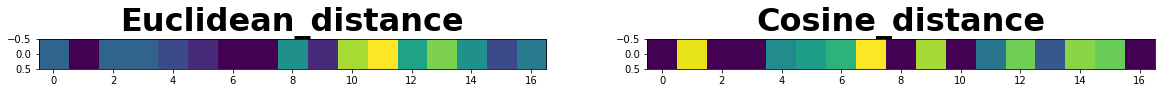

In [34]:
# YOU ARE REQUIRED TO INSERT YOUR CODE IN THIS CELL

# compute the distance matrices for k1_termdoc using the function "compute_distance_matrices"
# INSERT YOUR CODE HERE
euc_distance = compute_distance_matrices(k1_termdoc)[0]
cos_distance=compute_distance_matrices(k1_termdoc)[1]
#print(cos)
# Visualise the distance matrices for this keyword
# Hint: use imshow() and colorbar() functions
# INSERT YOUR CODE HERE


fig, (subplot_1, subplot_2) = plt.subplots(nrows=1, ncols=2,figsize=(20,10))
subplot_1.imshow(euc_distance)
subplot_2.imshow(cos_distance)
subplot_1.set_title('Euclidean_distance',fontsize=32, fontweight='bold')
subplot_2.set_title('Cosine_distance', fontsize=32, fontweight='bold')

euc_distance, cos_distance

In [49]:
# Explain why cosine distance is always in the range between 0 and 1.
# YOU ARE REQUIRED TO INSERT YOUR COMMENT IN THIS CELL
#mm
len(euc_distance), len(cos_distance), cos_distance, euc_distance
euc_distance.shape

(1, 17)

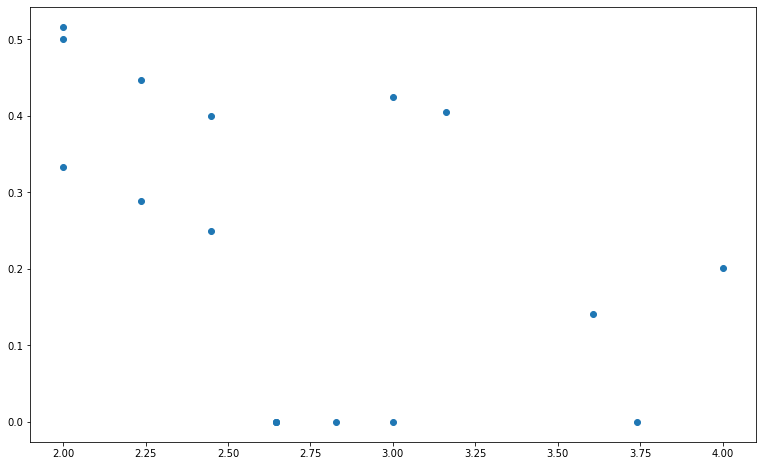

In [54]:
# Using a scatter plot demonstrate relationship between Euclidean distance and cosine distance.
# YOU ARE REQUIRED TO INSERT YOUR CODE IN THIS CELL
# INSERT YOUR CODE HERE
import pandas as pd
# pd.scatter_matrix(euclean_distance); plt.show()

figure, ax=plt.subplots(figsize=(13,8))# here variable must be ax.
#Plotting Data


sub_plot=ax.scatter(x=euc_distance, y=cos_distance,  cmap='viridis')

In [ ]:
# Explain why cosine distance increases if Euclidean distance decreases and vice versa.
# YOU ARE REQUIRED TO INSERT YOUR COMMENT IN THIS CELL
#
#Cosine similar measures the similarity between two vectors of an inner product space. 
#It is measured by the cosine of the angle between two vectors and determines whether two vectors are pointing 
#in roughly the same direction.

#similarity is measured between the two vectors by the cosine distance while on the othe hand euclean distance is the length 
#between the points. Pondeting upon this could tell that nature of both of these are inverse so that their behavior is.

**Instruction 2.13**. Similar to the example above for the first keyword, your task is to write codes in the cell below to compute the term-by-document matrix and the vocabulary for tweets stored in ***k2_tweets_processed***, print out the first **5** vocabularies and visualise this term-by-document matrix.

[**Total mark: 5**]

r s t u w
k2_termdoc [[0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 1 2 1 0]
 [0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 1 2 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0]
 [0 0 0 0 2 0 1 0 0 1 1 0 2 0 0 1 0 0 1]
 [1 0 2 0 2 0 0 1 0 0 0 0 1 0 1 3 0 0 0]
 [1 0 1 1 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1]
 [0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 1 0 0]
 [0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 0]
 [0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0]
 [1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 2 0 0 0 1 0 0]
 [1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0]
 [1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0]]


Text(0.5, 1.0, 'Term-by-Document matrix from tweets collected for keyword "selection"')

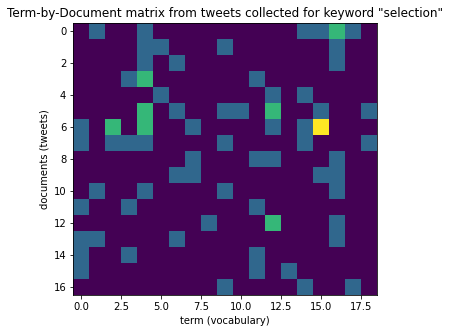

In [55]:
# YOU ARE REQUIRED TO INSERT YOUR CODE IN THIS CELL
'''
Write your codes to compute the term-by-document matrix and the vocabulary for tweets stored 
in k2_tweets_processed
'''
# INSERT YOUR CODE HERE
k2_termdoc, k2_vocab = construct_termdoc(tweet_k2_processed)

'''
Write your code print out the first 5 vocabularies 
'''
# INSERT YOUR CODE HERE
print(' '.join(k2_vocab[-5:]))

'''
Write your code to visualise the term-by-document matrix
'''
# INSERT YOUR CODE HERE
print('k2_termdoc', k2_termdoc)


# print out the term-by-document matrix

# print out the first 5 vocabulary entries
  # print out only the first 5 vocabulary entries

# visualise the term-by-document matrix
fig, ax = plt.subplots(figsize=(10, 5))
ax.imshow(k2_termdoc)
ax.set_xlabel('term (vocabulary)')
ax.set_ylabel('documents (tweets)')
ax.set_title('Term-by-Document matrix from tweets collected for keyword \"{}\"'.format(keywords[0]))

***Instruction 2.14***. Next, your task is to write codes in the cell below to calculate the pairwise distance matrix for tweets collected for **second** keyword. Store this distance matrix in the variable named ***k2_euclidean_distances*** and **visualise** this matrix.

[**Total mark: 10**]

(array([[2.64575131, 2.        , 2.64575131, 2.64575131, 2.44948974,
         2.23606798, 2.        , 2.        , 3.        , 2.23606798,
         3.74165739, 4.        , 3.16227766, 3.60555128, 3.        ,
         2.44948974, 2.82842712]]),
 array([[0.        , 0.5       , 0.        , 0.        , 0.25      ,
         0.28867513, 0.33333333, 0.51639778, 0.        , 0.4472136 ,
         0.        , 0.20100756, 0.40451992, 0.14142136, 0.42426407,
         0.4       , 0.        ]]))

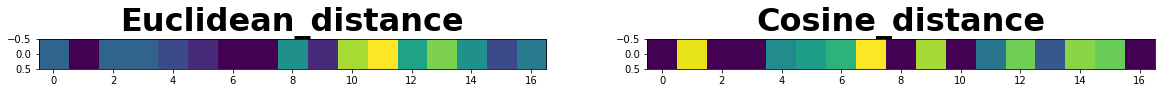

In [56]:
# YOU ARE REQUIRED TO INSERT YOUR CODE IN THIS CELL

# compute the distance matrix for k1_termdoc using the function "compute_euclidean_distance_matrix"
# INSERT YOUR CODE HERE
euc2_distance = compute_distance_matrices(k2_termdoc)[0]
cos2_distance=compute_distance_matrices(k2_termdoc)[1]
# Visualise the distance matrix for this keyword
# Hint: use imshow() and colorbar() functions
# INSERT YOUR CODE HERE


#print(cos)
# Visualise the distance matrices for this keyword
# Hint: use imshow() and colorbar() functions
# INSERT YOUR CODE HERE


fig, (subplot_1, subplot_2) = plt.subplots(nrows=1, ncols=2,figsize=(20,10))
subplot_1.imshow(euc2_distance)
subplot_2.imshow(cos2_distance)
subplot_1.set_title('Euclidean_distance',fontsize=32, fontweight='bold')
subplot_2.set_title('Cosine_distance', fontsize=32, fontweight='bold')

euc2_distance, cos2_distance

**Instruction 2.15**. Similarly, your task is to write codes in the cell below to compute the term-by-document matrix and the vocabulary for tweets stored in ***k3_tweets_processed***, print out the first **5** vocabularies and visualise this term-by-document matrix.

[**Total mark: 5**]

r s t u y
k2_termdoc [[0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0]
 [0 0 2 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]
 [1 0 0 0 0 1 0 1 1 0 0 1 0 0 0 1 0 0 0]
 [0 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0]
 [1 0 0 1 1 0 1 0 0 0 0 0 0 0 1 0 1 0 0]
 [1 0 0 0 0 0 1 2 0 1 0 0 1 0 1 1 0 1 0]
 [1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0]
 [1 0 1 1 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0]
 [1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [1 0 0 1 0 1 0 0 0 1 0 1 0 0 0 1 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1]
 [1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 2 0 0 0 0 0 0 1 1 2 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0]]


Text(0.5, 1.0, 'Term-by-Document matrix from tweets collected for keyword "selection"')

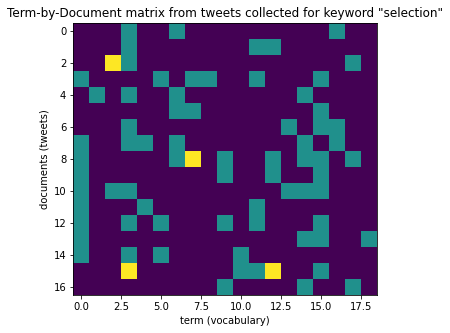

In [57]:
# YOU ARE REQUIRED TO INSERT YOUR CODE IN THIS CELL
'''
Write your codes to compute the term-by-document matrix and the vocabulary for tweets stored 
in k3_tweets_processed
'''
# INSERT YOUR CODE HERE
k3_termdoc, k3_vocab = construct_termdoc(tweet_k3_processed)

'''
Write your code print out the first 5 vocabularies 
'''
# INSERT YOUR CODE HERE
print(' '.join(k3_vocab[-5:]))

'''
Write your code to visualise the term-by-document matrix
'''
# INSERT YOUR CODE HERE
print('k2_termdoc', k3_termdoc)

fig, ax = plt.subplots(figsize=(10, 5))
ax.imshow(k3_termdoc)
ax.set_xlabel('term (vocabulary)')
ax.set_ylabel('documents (tweets)')
ax.set_title('Term-by-Document matrix from tweets collected for keyword \"{}\"'.format(keywords[0]))


***Instruction 2.16***. Next, your task is to write codes in the cell below to calculate the pairwise distance matrix for tweets collected for **third** keyword. Store this distance matrix in the variable named ***k3_euclidean_distances*** and visualise this matrix.

[**Total mark: 5**]

(array([[3.31662479, 3.31662479, 4.24264069, 4.12310563, 3.31662479,
         2.64575131, 2.64575131, 2.82842712, 2.23606798, 3.31662479,
         3.74165739]]),
 array([[0.36927447, 0.59408853, 0.40360368, 0.19611614, 0.15811388,
         0.2236068 , 0.2236068 , 0.53935989, 0.74620251, 0.42640143,
         0.        ]]))

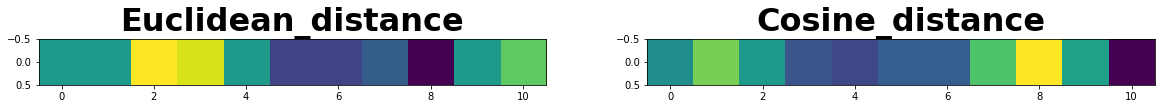

In [131]:
# YOU ARE REQUIRED TO INSERT YOUR CODE IN THIS CELL

# compute the distance matrices for k1_termdoc using the function "compute_distance_matrices"
# INSERT YOUR CODE HERE
euc3_distance = compute_distance_matrices(k3_termdoc)[0]
cos3_distance=compute_distance_matrices(k3_termdoc)[1]

# Visualise the distance matrix for this keyword
# Hint: use imshow() and colorbar() functions
# INSERT YOUR CODE HERE


fig, (subplot_1, subplot_2) = plt.subplots(nrows=1, ncols=2,figsize=(20,10))
subplot_1.imshow(euc3_distance)
subplot_2.imshow(cos3_distance)
subplot_1.set_title('Euclidean_distance',fontsize=32, fontweight='bold')
subplot_2.set_title('Cosine_distance', fontsize=32, fontweight='bold')

euc_distance, cos_distance

***Instruction 2.17 (HD)***. Compare the ranges of the values for cosine and Euclidean distances. Explain why the ranges are different. Think about the best example to explain why cosine distance is more convenient than Euclidean distance for text analysis.

[**Total mark: 5**]

In [ ]:
# Compare the ranges of the values for cosine and Euclidean distances. 
euc_distance, cos_distance
# Explain why the ranges are different. Explain why cosine distance 
# is more convenient than Euclidean distance for text analysis.
#
# YOU ARE REQUIRED TO INSERT YOUR COMMENT IN THIS CELL
#

# The advantage of cosine is because for example if two documents are , by the distance od euclidean, apart owing to the
# multiplw reasons it woould still haave lower angle between them. Higher would be the similarity if angle is amaller.

### Part 2C: Data Clustering

Thus far in this assignment, we have collected tweets for each keyword and analysed them seperately. We have constructed the term-by-document matrix for each collection of tweets seperately. A fundemantal and common task in data science, analytics, machine learning, science and engineering is **clustering**. This is also known as unsupervised learning or exploratory data analysis as we have learned in our classes.

This part of this assignment will use the Kmeans algorithm learned in our classes to cluster the **entire** colllection of tweets collected for **all** keywords. To do so, we need to compute the **distance** between **any** two pair of tweets. This requires us to compute a **joint** term-by-document matrix for all tweets.

The reason that we **cannot** use the individual term-by-document matrices computed earlier (e.g.,***k1_termdoc, k2_termdoc, k3_termdoc***) for this task is because they have different dictionary sizes. Hence, tweets collected for different keywords have been represented by vectors of different dimension. 

The following piece of codes will help you to inspect these dimensions.

In [58]:
print('Dimension of the term-by-document matrix for keyword \"{}\":'.format(keywords[0]))
print('{} x {}\n'.format(k1_termdoc.shape[0],k1_termdoc.shape[1]))

print('Dimension of the term-by-document matrix for keyword \"{}\":'.format(keywords[1]))
print('{} x {}\n'.format(k2_termdoc.shape[0],k2_termdoc.shape[1]))

print('Dimension of the term-by-document matrix for keyword \"{}\":'.format(keywords[2]))
print('{} x {}\n'.format(k3_termdoc.shape[0],k3_termdoc.shape[1]))

Dimension of the term-by-document matrix for keyword "selection":
18 x 20

Dimension of the term-by-document matrix for keyword "bath":
17 x 19

Dimension of the term-by-document matrix for keyword "step":
17 x 19



**Note**. First, we need to gather all tweets together into a new variable named **all_tweets_processed** using the piece of codes below.

In [59]:
all_tweets_processed = tweet_k1_processed + tweet_k2_processed + tweet_k3_processed

**Instruction 2.18**. Your task is to write codes in the cell below to compute the term-by-document matrix and the vocabulary for all tweets stored in ***all_tweets_processed***, print out the first 5 vocabularies and visualise this term-by-document matrix.

[**Total marks: 5**]

s t u w y


Text(0.5, 1.0, 'Term-by-Document matrix from tweets collected for keyword "selection"')

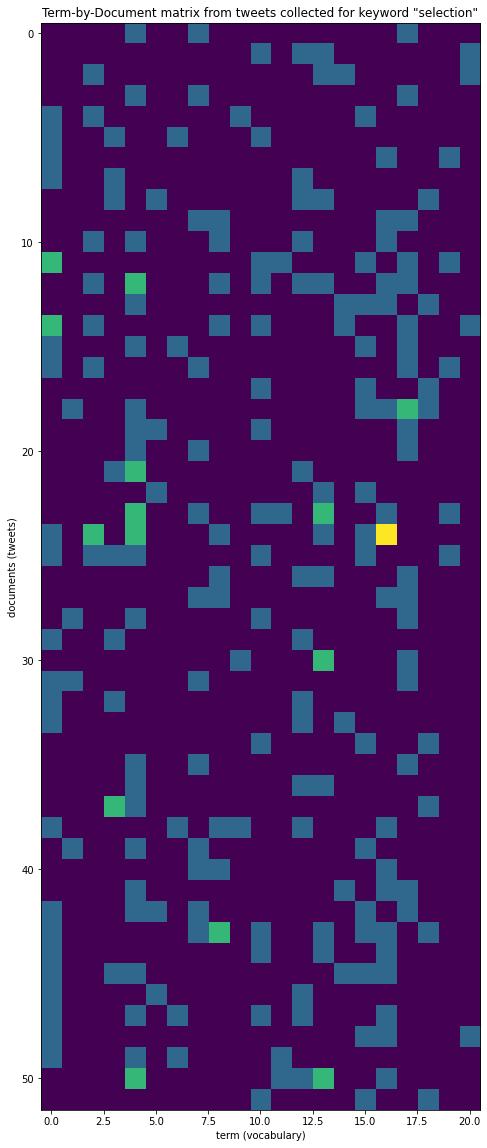

In [63]:
# YOU ARE REQUIRED TO INSERT YOUR CODE IN THIS CELL
'''
Write your codes to compute the term-by-document matrix and the vocabulary for all tweets stored 
in all_tweets_processed
'''

all_termdoc, all_vocab = construct_termdoc(all_tweets_processed)

'''
Write your code print out the first 5 vocabularies 
'''
# INSERT YOUR CODE HERE
print(' '.join(all_vocab[-5:]))
'''
Write your code to visualise the term-by-document matrix
'''
# INSERT YOUR CODE HERE
fig, ax = plt.subplots(figsize=(30, 20))
ax.imshow(all_termdoc)
ax.set_xlabel('term (vocabulary)')
ax.set_ylabel('documents (tweets)')
ax.set_title('Term-by-Document matrix from tweets collected for keyword \"{}\"'.format(keywords[0]))

**Instruction 2.19**. Next, your task is to write codes in the cell below to calculate the pairwise distance matrix for all tweets collected. Store this distance matrix in the variable named ***all_euclidean_distances*** and visualise this matrix.

[**Total mark: 5**]

Text(0.5, 1.0, 'all_cosine_distances')

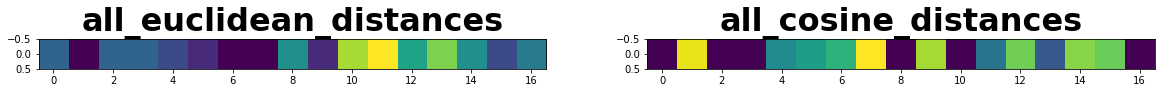

In [65]:
# YOU ARE REQUIRED TO INSERT YOUR CODE IN THIS CELL

# compute the Euclidean distance matrix using compute_euclidean_distance_matrix() function

all_euclidean_distances=compute_distance_matrices(all_termdoc)[0]
all_cosine_distances = compute_distance_matrices(all_termdoc)[1]
# INSERT YOUR CODE HERE

# Visualise the distance matrix for this keyword
# INSERT YOUR CODE HERE



fig, (subplot_1, subplot_2) = plt.subplots(nrows=1, ncols=2,figsize=(20,10))
subplot_1.imshow(all_euclidean_distances)
subplot_2.imshow(all_cosine_distances)
subplot_1.set_title('all_euclidean_distances',fontsize=32, fontweight='bold')
subplot_2.set_title('all_cosine_distances', fontsize=32, fontweight='bold')



**Instruction 2.20 (HD)**. 
1. Your task is to produce a scatter plot of Euclidean vs cosine distance for all tweets. [**2 marks**]
2. Fit first and second order polynomials to the data in the scatter plot and overplot them. [**3 marks**]
3. Explain why the plotted curves do not go through the centre of the points cloud. [**4 marks**]
4. Which visualisation technique would be better to use here? [**1 mark**]

[**Total mark: 10**]

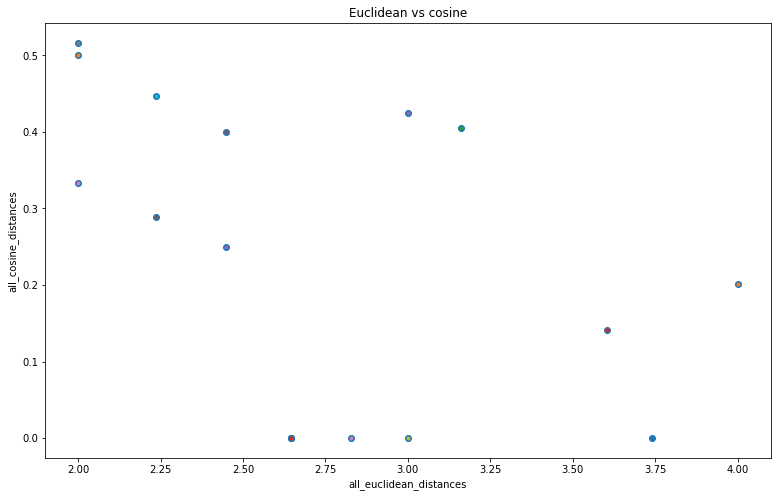

In [85]:
# YOU ARE REQUIRED TO INSERT YOUR CODE IN THIS CELL
# 1. Your task is to produce a scatter plot of Euclidean vs cosine distance for all tweets.
# INSERT YOUR CODE HERE
figure, ax=plt.subplots(figsize=(13,8))# here variable must be ax.


sub_plot=ax.scatter(x=all_euclidean_distances, y=all_cosine_distances,  cmap='viridis')
ax.set(title = 'Euclidean vs cosine', xlabel='all_euclidean_distances', ylabel='all_cosine_distances' )
#2. Fit a second order polynomial to the data in the scatter plot and overplot it. 
# INSERT YOUR CODE HERE
import numpy as np
from numpy.polynomial.polynomial import polyfit
import matplotlib.pyplot as plt


xx=all_euclidean_distances
yy=all_cosine_distances
# b, m = polyfit(all_euclidean_distances[0], all_cosine_distances[0], 3)
plt.plot(xx, yy, '.')
# plt.plot(x, b + m * x, '-')
plt.show()


In [ ]:
# YOU ARE REQUIRED TO INSERT YOUR COMMENT IN THIS CELL
#3. Explain why the plotted curves do not go through the centre of the points cloud.
#4. Which visualisation technique would be better to use here?
# INSERT YOUR COMMENTS HERE
#


**Note**. Next, we use Kmeans algorithm to cluster all tweets stored in term-by-document matrix ***all_termdoc***. An important requirement for the Kmeans is the specification of the number of clusters which will be specified the variable **n_clusters**.

The following piece of codes will initialise a ***kmeans*** object to be used for subsequent clustering task.

In [86]:
'''
Initialise a kmeans object  from scikit-lean package
'''
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', n_init=5, max_iter=3000,
                verbose=True, tol=0.000001, random_state=123456)


**Instruction 2.21**. Your task is to use the variable ***kmeans*** to perform clustering on the data stored in the variable ***all_termdoc***.

[**Total mark: 5**]

In [118]:
# YOU ARE REQUIRED TO INSERT YOUR CODE IN THIS CELL

'''
Use the variable kmeans to perform clustering on the data stored in the variable all_termdoc
Hint: revise the practical session on Kmeans algorithm or check out the documentation from scikit-learn
for Kmeans algorithm.
'''
# INSERT YOUR CODE HERE

from sklearn.cluster import KMeans
import numpy as np
X = all_termdoc
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
# kmeans.labels_
# array([1, 1, 1, 0, 0, 0], dtype=int32)
#kmeans.predict([[0, 0], [12, 3]])
# array([1, 0], dtype=int32)


**Instruction 2.22**. Write your codes to print out the cluster centers.

[**Total mark: 5**]

In [114]:
# YOU ARE REQUIRED TO INSERT YOUR CODE IN THIS CELL
'''
Write your codes to print out the cluster centers.
'''
# INSERT YOUR CODE HERE
kmeans.cluster_centers_

array([[6.80000000e-01, 4.16333634e-17, 1.60000000e-01, 2.40000000e-01,
        1.20000000e-01, 1.20000000e-01, 1.20000000e-01, 0.00000000e+00,
        1.20000000e-01, 1.20000000e-01, 4.00000000e-01, 4.00000000e-02,
        4.40000000e-01, 3.60000000e-01, 1.20000000e-01, 3.20000000e-01,
        2.00000000e-01, 1.60000000e-01, 1.60000000e-01, 1.20000000e-01,
        1.60000000e-01],
       [2.85714286e-01, 1.90476190e-01, 4.76190476e-02, 1.90476190e-01,
        8.09523810e-01, 9.52380952e-02, 9.52380952e-02, 5.23809524e-01,
        1.42857143e-01, 0.00000000e+00, 9.52380952e-02, 4.76190476e-02,
        4.76190476e-02, 1.66533454e-16, 1.42857143e-01, 2.85714286e-01,
        3.33333333e-01, 7.14285714e-01, 1.42857143e-01, 4.76190476e-02,
        4.16333634e-17],
       [3.33333333e-01, 0.00000000e+00, 6.66666667e-01, 0.00000000e+00,
        1.50000000e+00, 0.00000000e+00, 0.00000000e+00, 3.33333333e-01,
        8.33333333e-01, 0.00000000e+00, 5.00000000e-01, 3.33333333e-01,
        5.0000

**Instruction 2.23 (HD)**. Explain below why visualising the clusters here is hard to do in this case.

[**Total mark: 5**]

In [146]:
# YOU ARE REQUIRED TO INSERT YOUR COMMENT IN THIS CELL
# Explain below why visualising the clusters here is hard to do in this case.
# INSERT YOUR COMMENT HERE

# The above-mentioned three clusters actuallt might start massively close to one another. This may be the cause of problem of being
# hard to visualize

**Instruction 2.24 (HD)**. Nevertheless, it is possible to visualise the structure of the cluster centres - surprisingly, using bar charts. Each vector component in the cluster centre vectors corresponds to a word in the dictionary. The value (amplitude) of the vector component for each particular word in the dictionary shows the strength of presence of a word in the cluster.
In this task, you want to:
1. Plot bar charts for each of the three clusters, obtained from KMeans, where each bar chart has 20 strongest words sorted by their presence strength. [**5 marks**]
2. Explain the bar charts from the point of view of chosen keywords, English grammar and our text preprocessing routine. [**5 marks**]

[**Total mark: 10**]

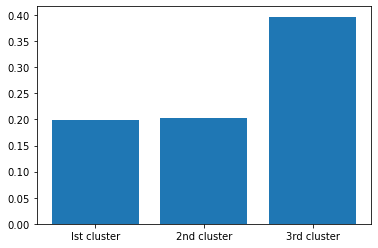

In [115]:
# YOU ARE REQUIRED TO INSERT YOUR CODE IN THIS CELL
# 1. Plot bar charts for each of the three clusters, obtained from KMeans, 
# where each bar chart has 20 strongest words sorted by their presence strength.
# INSERT YOUR CODE HERE
shop = { 'Ist cluster':kmeans.cluster_centers_[0].mean(), '2nd cluster':kmeans.cluster_centers_[1].mean(),
       '3rd cluster':kmeans.cluster_centers_[2].mean()}
figure, sub_plot=plt.subplots()
sub_plot.bar(shop.keys(), shop.values());

In [ ]:
# YOU ARE REQUIRED TO INSERT YOUR COMMENT IN THIS CELL
# Explain the bar charts from the point of view of chosen keywords, English grammar 
# and our text preprocessing routine.
# INSERT YOUR COMMENT HERE

#Three words were chosen and bar graph of three of them is being shown above. In the preprocess of fitting the k-means cluster 
#n_clusters were defined. In our case we took three as per the nature of task or as we are dealing with three words.

**Instruction 2.25**. Write your codes to print out the first **200** cluster labels assigned to the first 200 tweets.

[**Total marks: 5**]

In [116]:
# YOU ARE REQUIRED TO INSERT YOUR CODE IN THIS CELL
'''
Write your codes to print out the first **200** cluster labels assigned to the first 200 tweets.
'''
# INSERT YOUR CODE HERE
kmeans.labels_[0:200]

array([1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 2, 0, 2, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 2, 2, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 2,
       0, 1, 0, 0, 0, 1, 2, 0])

**Instruction 2.26**. Next, we would like to obtain the quality of our clustering results. Write your code to obtain the labels of tweets for each keyword and store the labels in three new variables ***k1_labels***, ***k2_labels*** and ***k3_labels***, respectively.

**[Total marks: 5]**

In [122]:
# YOU ARE REQUIRED TO INSERT YOUR CODE IN THIS CELL

'''
Write your code to obtain the labels of tweets for each keyword
and store the labels of the first keyword in ***k1_labels***, 
the labels of the second keyword in ***k2_labels*** and
the labels of the third keyword in ***k3_labels***.
'''
# INSERT YOUR CODE HERE
from sklearn.cluster import KMeans
import numpy as np
X1 = k1_termdoc
kmeans1 = KMeans(n_clusters=3, random_state=0).fit(X1)

X2 = k2_termdoc
kmeans2 = KMeans(n_clusters=3, random_state=0).fit(X2)

X3 = k3_termdoc
kmeans3 = KMeans(n_clusters=3, random_state=0).fit(X3)


k1_labels=kmeans1.labels_
k2_labels=kmeans2.labels_
k3_labels=kmeans3.labels_

print('k1_labels', k1_labels)
print('k2_labels', k2_labels)
print('k3_labels', k3_labels)

k1_labels [2 0 0 2 1 1 1 1 0 2 2 1 2 2 1 1 1 0]
k2_labels [0 0 0 1 0 0 2 1 0 0 0 1 0 1 1 1 0]
k3_labels [0 1 1 1 0 0 0 0 2 1 0 1 1 0 1 1 0]


**Instruction 2.27 (D)**. We examine what is the proprotion of tweets from different keywords (or categories) appear in the **first** cluster. Remember that **0** is the label for the first cluster (**1** for the second and **2** for the third clusters). Your tasks are:

1. Write your code to obtain the list of tweet indices of each keyword that are assigned to the first cluster. **(3 marks)**

2. Plot a bar chart to visualise the number of tweets of each keyword that are assigned to the first cluster. **(2 marks)**

**[Total mark: 5]**

In [135]:
# YOU ARE REQUIRED TO INSERT YOUR CODE IN THIS CELL
'''
Write your code to obtain the list of tweet indices of each keyword that are assigned to the first cluster.
Hint: you might want to use numpy.where function.
'''
# obtain the list of tweet indices of keyword k1 that are assigned to the first cluster
# means that to find tweet indices that have label 0 in k1_labels
k1_idx_label0 = []


for i in range(len(k1_labels.tolist())):


    if k1_labels.tolist()[i] == 0:
        k1_idx_label0.append(i)

# obtain the list of tweet indices of keyword k2 that are assigned to the first cluster
# means that to find tweet indices that have label 0 in k2_labels
# INSERT YOUR CODE HERE

k2_idx_label0 = []
for i in range(len(k2_labels.tolist())):


    if k2_labels.tolist()[i] == 0:
         k2_idx_label0.append(i)

# obtain the list of tweet indices of keyword k3 that are assigned to the first cluster
# means that to find tweet indices that have label 0 in k3_labels
# INSERT YOUR CODE HERE

k3_idx_label0 = []
for i in range(len(k3_labels.tolist())):


    if k3_labels.tolist()[i] == 0:
         k3_idx_label0.append(i)

print('k1_idx_label0',k1_idx_label0, "\n", 'k2_idx_label0', k2_idx_label0, "\n",'k3_idx_label0', k3_idx_label0)

k1_idx_label0 [1, 2, 8, 17] 
 k2_idx_label0 [0, 1, 2, 4, 5, 8, 9, 10, 12, 16] 
 k3_idx_label0 [0, 4, 5, 6, 7, 10, 13, 16]


12

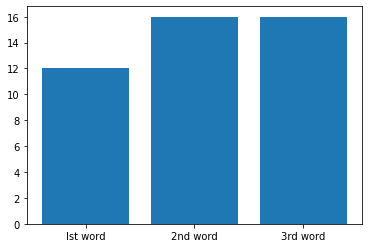

In [143]:
# YOU ARE REQUIRED TO INSERT YOUR CODE IN THIS CELL
'''
Plot a bar chart to visualise the number of tweets of each keyword that are assigned to the first cluster.
Hint: you need to plot a bar chart with three bars, 
each bar represents the number of tweets of each keyword that are assigned to the first cluster.
'''
# INSERT YOUR CODE HERE
shop = { 'Ist word':len(k1_idx_label0), '2nd word':len(k2_idx_label0),
       '3rd word':len(k3_idx_label0)}
figure, sub_plot=plt.subplots()
sub_plot.bar(shop.keys(), shop.values());

**Instruction 2.28 (D)**. Similarly, write your codes to compute the the proprotion of tweets from different keywords (or categories) appear in the **second** cluster and plot a bar chart visualise this information.

[**Total mark: 5**]

k1_idx_label1 [4, 5, 6, 7, 11, 14, 15, 16] 
 k2_idx_label1 [3, 7, 11, 13, 14, 15] 
 k3_idx_label [1, 2, 3, 9, 11, 12, 14, 15]


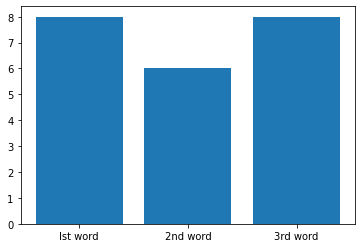

In [142]:
# YOU ARE REQUIRED TO INSERT YOUR CODE IN THIS CELL

# obtain the list of tweet indices of keyword k1 that are assigned to the second cluster
# means that to find tweet indices that have label 1 in k1_labels
# INSERT YOUR CODE HERE

k1_idx_label1 = []
for i in range(len(k1_labels.tolist())):


    if k1_labels.tolist()[i] == 1:
         k1_idx_label1.append(i)

# obtain the list of tweet indices of keyword k2 that are assigned to the second cluster
# means that to find tweet indices that have label 1 in k2_labels
# INSERT YOUR CODE HERE

k2_idx_label1 = []
for i in range(len(k2_labels.tolist())):


    if k2_labels.tolist()[i] == 1:
         k2_idx_label1.append(i)

# obtain the list of tweet indices of keyword k3 that are assigned to the second cluster
# means that to find tweet indices that have label 1 in k3_labels
# INSERT YOUR CODE HERE

k3_idx_label1= []
for i in range(len(k3_labels.tolist())):


    if k3_labels.tolist()[i] == 1:
         k3_idx_label1.append(i)
print('k1_idx_label1',k1_idx_label1, "\n", 'k2_idx_label1', k2_idx_label1, "\n",'k3_idx_label', k3_idx_label1)
# Plot a bar chart to visualise the number of tweets of each keyword that are assigned to the second cluster
# INSERT YOUR CODE HERE
shop = { 'Ist word':len(k1_idx_label1), '2nd word':len(k2_idx_label1),
       '3rd word':len(k3_idx_label1)}
figure, sub_plot=plt.subplots()
sub_plot.bar(shop.keys(), shop.values());

**Instruction 2.29 (D)**. Similarly, write your codes to compute the the proprotion of tweets from different keywords (or categories) appear in the **third** cluster and plot a bar chart visualise this information.

[**Total mark: 5**]

k1_idx_label2 [0, 3, 9, 10, 12, 13] 
 k2_idx_label2 [6] 
 k3_idx_label2 [8]


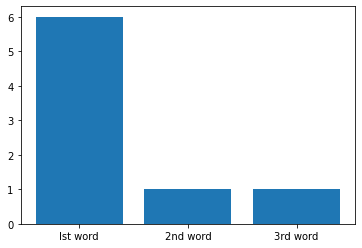

In [144]:
# YOU ARE REQUIRED TO INSERT YOUR CODE IN THIS CELL

# obtain the list of tweet indices of keyword k1 that are assigned to the third cluster
# means that to find tweet indices that have label 2 in k1_labels
# INSERT YOUR CODE HERE

k1_idx_label2= []
for i in range(len(k1_labels.tolist())):


    if k1_labels.tolist()[i] == 2:
         k1_idx_label2.append(i)

# obtain the list of tweet indices of keyword k2 that are assigned to the third cluster
# means that to find tweet indices that have label 2 in k2_labels
# INSERT YOUR CODE HERE

k2_idx_label2= []
for i in range(len(k2_labels.tolist())):


    if k2_labels.tolist()[i] == 2:
         k2_idx_label2.append(i)
# obtain the list of tweet indices of keyword k3 that are assigned to the third cluster
# means that to find tweet indices that have label 2 in k3_labels
# INSERT YOUR CODE HERE

k3_idx_label2= []
for i in range(len(k3_labels.tolist())):


    if k3_labels.tolist()[i] == 2:
         k3_idx_label2.append(i)
print('k1_idx_label2',k1_idx_label2, "\n", 'k2_idx_label2', k2_idx_label2, "\n",'k3_idx_label2', k3_idx_label2)
# Plot a bar chart to visualise the number of tweets of each keyword that are assigned to the third cluster
# INSERT YOUR CODE HERE
shop = { 'Ist word':len(k1_idx_label2), '2nd word':len(k2_idx_label2),
       '3rd word':len(k3_idx_label2)}
figure, sub_plot=plt.subplots()
sub_plot.bar(shop.keys(), shop.values());

### END OF ASSIGNMENT 2 NOTEBOOK

----